# Xueyong Zhang

r
### Research Question
In the gaming industry, different genres often align with specific game categories, such as multiplayer and single-player experiences. Understanding these relationships can provide insights into game design trends and player preferences. This study aims to analyze which genres are most frequently associated with key game categories (e.g., Multiplayer, Single-player, Co-op) and whether certain categories contribute to a game’s success. Success will be measured using key indicators such as total reviews, positive review percentage, and Metacritic scores. By examining these trends, we can determine which game categories are more likely to lead to commercially and critically successful games and how genre-category pairings influence overall player engagement. This research can provide useful insights for game developers and publisher
s.
### Interests
Proper combination of genres and categories for video game. Difference in the distinct genres of gaee.

In [1]:
# Run this cell to ensure that altair plots show up without having
# the notebook be really large.
# We will talk more about what these lines do later in the course

import os
import altair as alt
import pandas as pd
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [2]:
path = '../../data/processed/cleaned_games.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(58041, 21)


,Unnamed: 0,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
2,3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
3,4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99
4,7,2719710,Manor Madness,['Apericot Studio'],['Apericot Studio'],"['Single-player', 'Steam Achievements', 'HDR a...","['Action', 'Adventure', 'Indie', 'RPG', 'Simul...",0,5,"['windows', 'mac', 'linux']",...,[],0,0,0,0.0,No user reviews,0.0,0,True,0.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58041 entries, 0 to 58040
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           58041 non-null  int64  
 1   steam_appid          58041 non-null  int64  
 2   name                 58041 non-null  object 
 3   developers           58041 non-null  object 
 4   publishers           58041 non-null  object 
 5   categories           58041 non-null  object 
 6   genres               58041 non-null  object 
 7   required_age         58041 non-null  int64  
 8   n_achievements       58041 non-null  int64  
 9   platforms            58041 non-null  object 
 10  release_date         58041 non-null  object 
 11  additional_content   58041 non-null  object 
 12  total_reviews        58041 non-null  int64  
 13  total_positive       58041 non-null  int64  
 14  total_negative       58041 non-null  int64  
 15  review_score         58041 non-null 

In [4]:
categorical_cardinality = data.select_dtypes(include=['object']).nunique()
print(categorical_cardinality)

name                  57768
developers            39400
publishers            34427
categories             5768
genres                 2169
platforms                 7
release_date           4320
additional_content     7083
review_score_desc        19
dtype: int64


In [5]:
int_cardinality = data.select_dtypes(include=['int64', 'float64']).nunique()
print(int_cardinality)

Unnamed: 0             58041
steam_appid            58041
required_age              69
n_achievements           343
total_reviews           2770
total_positive          2598
total_negative          1190
review_score              10
positive_percentual      805
metacritic                69
price_initial (USD)      247
dtype: int64


In [6]:
data.describe()

,Unnamed: 0,steam_appid,required_age,n_achievements,total_reviews,total_positive,total_negative,review_score,positive_percentual,metacritic,price_initial (USD)
count,58041.000000,5.804100e+04,58041.000000,58041.000000,5.804100e+04,5.804100e+04,58041.000000,58041.000000,58041.000000,58041.000000,58041.000000
mean,36514.232439,1.477672e+06,3.161403,19.788443,5.048798e+02,4.433147e+02,61.565083,2.698661,56.749991,3.161403,8.016004
std,20389.435037,8.362123e+05,15.002913,152.944774,9.304848e+03,8.217716e+03,1298.842646,3.323821,39.538575,15.002913,14.185095
min,0.000000,7.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18878.000000,7.998700e+05,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.990000
50%,37161.000000,1.395250e+06,0.000000,5.000000,5.000000e+00,4.000000e+00,1.000000,0.000000,70.500000,0.000000,4.990000
75%,53886.000000,2.268880e+06,0.000000,20.000000,3.000000e+01,2.300000e+01,7.000000,6.000000,92.400000,0.000000,9.990000
max,71428.000000,3.430140e+06,97.000000,9821.000000,1.279700e+06,1.107275e+06,172425.000000,9.000000,100.000000,97.000000,999.980000


In [7]:
columns_to_process = ['developers', 'publishers', 'categories', 'genres', 'platforms']
for col in columns_to_process:
    data[col] = data[col].apply(lambda x: eval(x) if isinstance(x, str) else x)
unique_values_info = {}
for col in columns_to_process:
    all_values = set(value for sublist in data[col].dropna() for value in sublist)
    unique_values_info[col] = {
        "num_unique": len(all_values),
        "unique_values": sorted(all_values)
    }

# Display the results
for col, info in unique_values_info.items():
    print(f"Column: {col}")
    print(f"Total Unique Values: {info['num_unique']}")
    print(f"List of Unique Values: {info['unique_values'][:42]} ... (truncated)")
    print("-" * 80)

Column: developers
Total Unique Values: 42018
List of Unique Values: ['!CyberApex (SkagoGames)', '!ReTigma Studio', '"RevDay Studio"', '#12', '#30A6D-S (Kuma)', '#NVJOB', '#workshop', '$mitE', '(STCG) Smoker The Car Game', '(주)펀웨이브', '+7 Software', '+Mpact Games, LLC.', '+Umbrella', '-', '-Yodasaurus- Games', '-yu-', '-乌鸦男-', '.Cat', '.M.Y.W.', '.NetXCore', '.ToNg', '.dat', '.ez Games', '//commentout', '0 Deer Soft', '00110110', '007berd', '01 Games', '011 Games', '027 Studios', '07th Expansion', '08 Games', '0Bennyman', '0Cube', '0Dark&Nerdy', '0_stamina', '0ddarriCompany', '0o0', '0x3', '1 Flame Studio', '1 Poss Studio', '1/13s'] ... (truncated)
--------------------------------------------------------------------------------
Column: publishers
Total Unique Values: 34571
List of Unique Values: ['!ReTigma Studio', '"RevDay Studio"', '#30A6D-S (Kuma)', '$mitE', '(Mark Ainsworth)', '(Myco)', '(STCG) Smoker The Car Game', '(주)펀웨이브', '++Good Games', '+7 Software', '+Mpact Games, LLC.', '+U

In [8]:
data_sorted = data.sort_values(by='release_date', ascending=False)
data_sorted['release_date']

51496    2025-01-23
51590    2025-01-23
51289    2025-01-23
49107    2025-01-22
45583    2025-01-22
            ...    
20888    2005-04-01
20887    2003-07-01
20886    2001-12-01
21009    2001-03-15
19878    1997-06-30
Name: release_date, Length: 58041, dtype: object

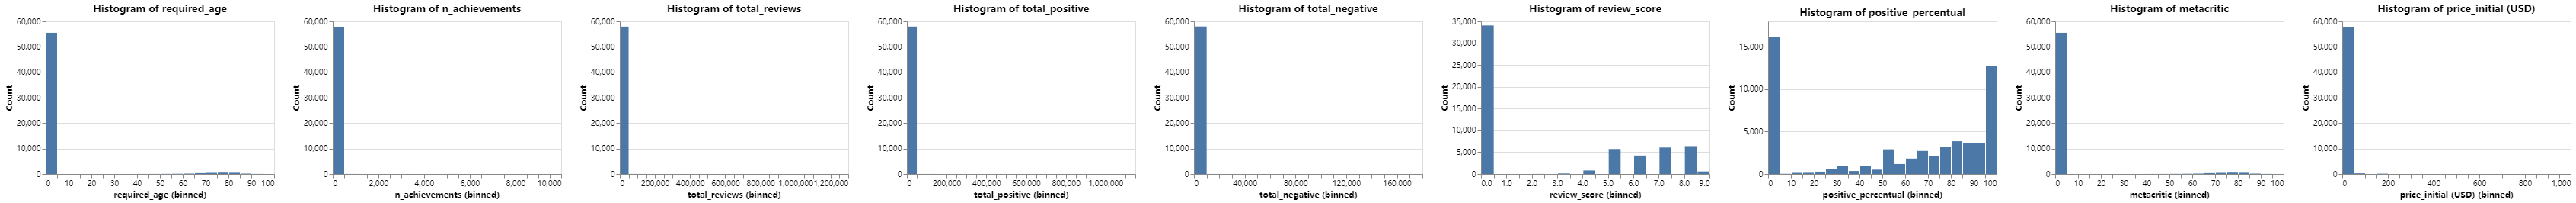

In [9]:
numeric_cols = ['required_age', 'n_achievements', 'total_reviews', 
                'total_positive', 'total_negative', 'review_score', 
                'positive_percentual', 'metacritic', 'price_initial (USD)']

hist_charts = []
for col in numeric_cols:
    chart = alt.Chart(data).mark_bar().encode(
        alt.X(f"{col}:Q", bin=alt.Bin(maxbins=30)),
        alt.Y('count()', title='Count')
    ).properties(
        width=300,
        height=200,
        title=f"Histogram of {col}"
    )
    hist_charts.append(chart)
    
alt.hconcat(*hist_charts).display()

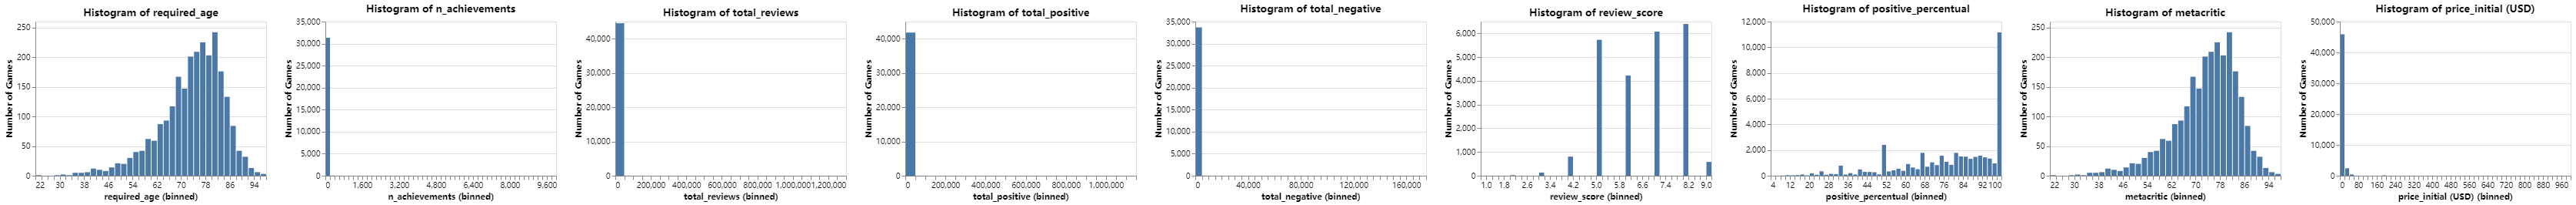

In [10]:
hist_charts_non_zero = []
for col in numeric_cols:
    chart = alt.Chart(data).transform_filter(alt.FieldGTPredicate(field=f"{col}", gt=0)
    ).mark_bar().encode(
        alt.X(f"{col}:Q", bin=alt.Bin(maxbins=50)),
        alt.Y('count()', title='Number of Games')
    ).properties(
        width=300,
        height=200,
        title=f"Histogram of {col}"
    )
    hist_charts_non_zero.append(chart)
    
hist_numerical_non_zero = alt.hconcat(*hist_charts_non_zero)
# hist_numerical_non_zero.save("hist_numerical_non_zero.png")
hist_numerical_non_zero

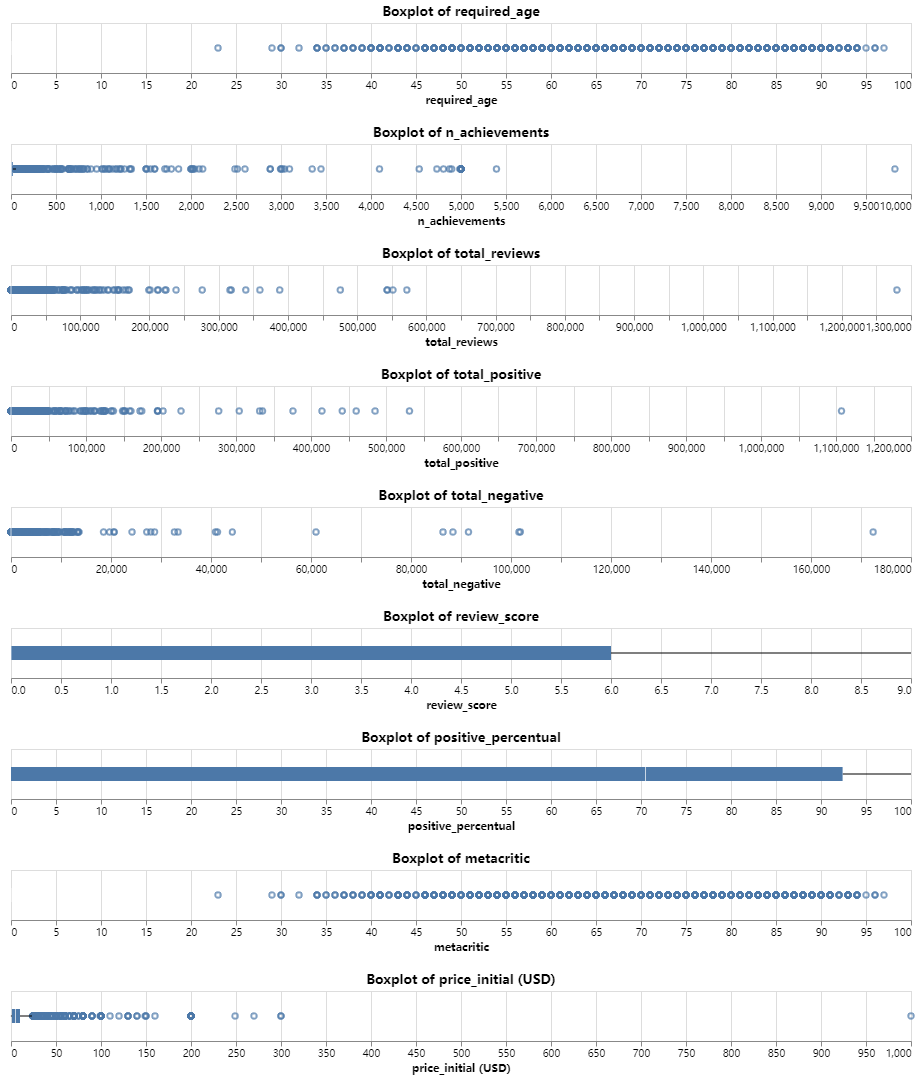

In [17]:
box_plots = []
for col in numeric_cols:
    chart = alt.Chart(data).mark_boxplot().encode(
        x=alt.X(f"{col}:Q", title=col)
    ).properties(
        width=900,
        height=50,
        title=f"Boxplot of {col}"
    )
    box_plots.append(chart)
    
box_plot = alt.vconcat(*box_plots)
box_plot

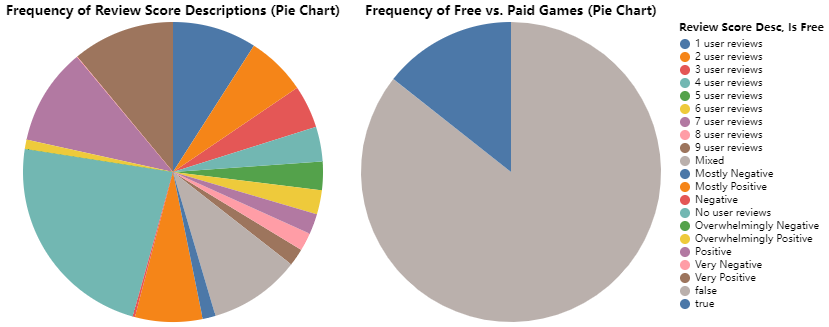

In [12]:
pie_chart_review = alt.Chart(data).mark_arc().encode(
    theta=alt.Theta("count():Q", stack=True),
    color=alt.Color("review_score_desc:N", legend=alt.Legend(title="Review Score Desc")),
    tooltip=[alt.Tooltip("review_score_desc:N", title="Review Score Desc"),
             alt.Tooltip("count():Q", title="Count")]
).properties(
    title="Frequency of Review Score Descriptions (Pie Chart)",
    width=300,
    height=300
)

pie_chart_is_free = alt.Chart(data).mark_arc().encode(
    theta=alt.Theta("count():Q", stack=True),
    color=alt.Color("is_free:N", legend=alt.Legend(title="Is Free")),
    tooltip=[alt.Tooltip("is_free:N", title="Is Free"),
             alt.Tooltip("count():Q", title="Count")]
).properties(
    title="Frequency of Free vs. Paid Games (Pie Chart)",
    width=300,
    height=300
)

pie_charts = alt.hconcat(pie_chart_review, pie_chart_is_free)
# pie_charts.save("pie_charts.png")
pie_charts

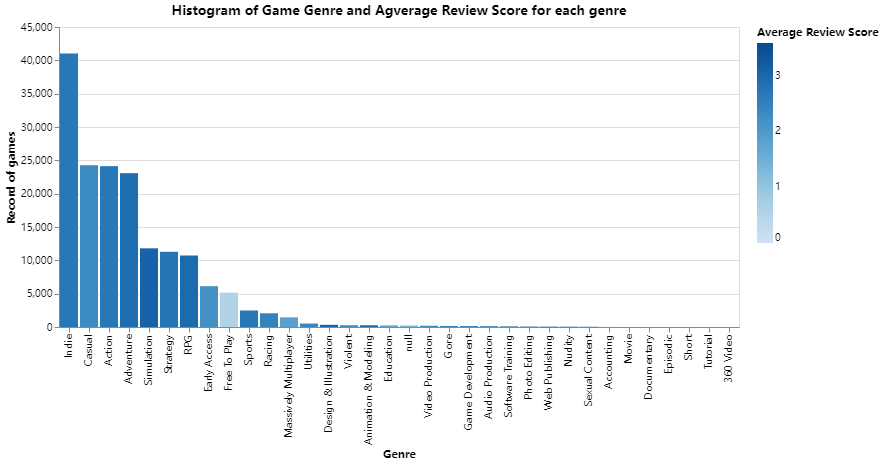

In [13]:
boom_genres = data.explode('genres')
hist_genres = alt.Chart(boom_genres).mark_bar().encode(
    x=alt.X('genres:N', title="Genre", sort='-y'),
    y=alt.Y('count():Q', title="Record of games"),
    color=alt.Color('average(review_score):Q', title="Average Review Score")
).properties(
    title = 'Histogram of Game Genre and Agverage Review Score for each genre' 
)
# hist_genres.save("hist_genres.png")
hist_genres

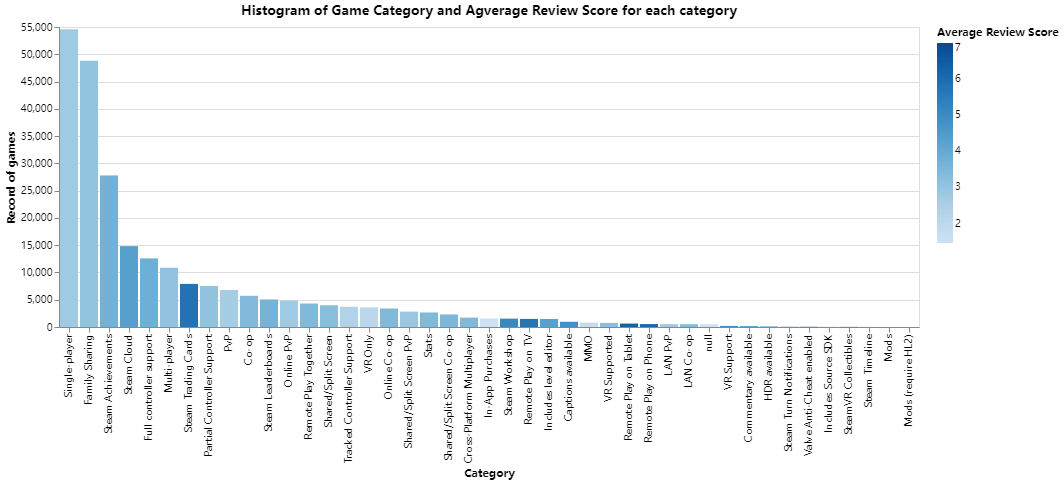

In [14]:
boom_categories = data.explode('categories')
hist_categories = alt.Chart(boom_categories).mark_bar().encode(
    x=alt.X('categories:N', title="Category", sort='-y'),
    y=alt.Y('count():Q', title="Record of games"),
    color=alt.Color('average(review_score):Q', title="Average Review Score")
).properties(
    title = 'Histogram of Game Category and Agverage Review Score for each category' 
)
# hist_categories.save("hist_categories.png")
hist_categories

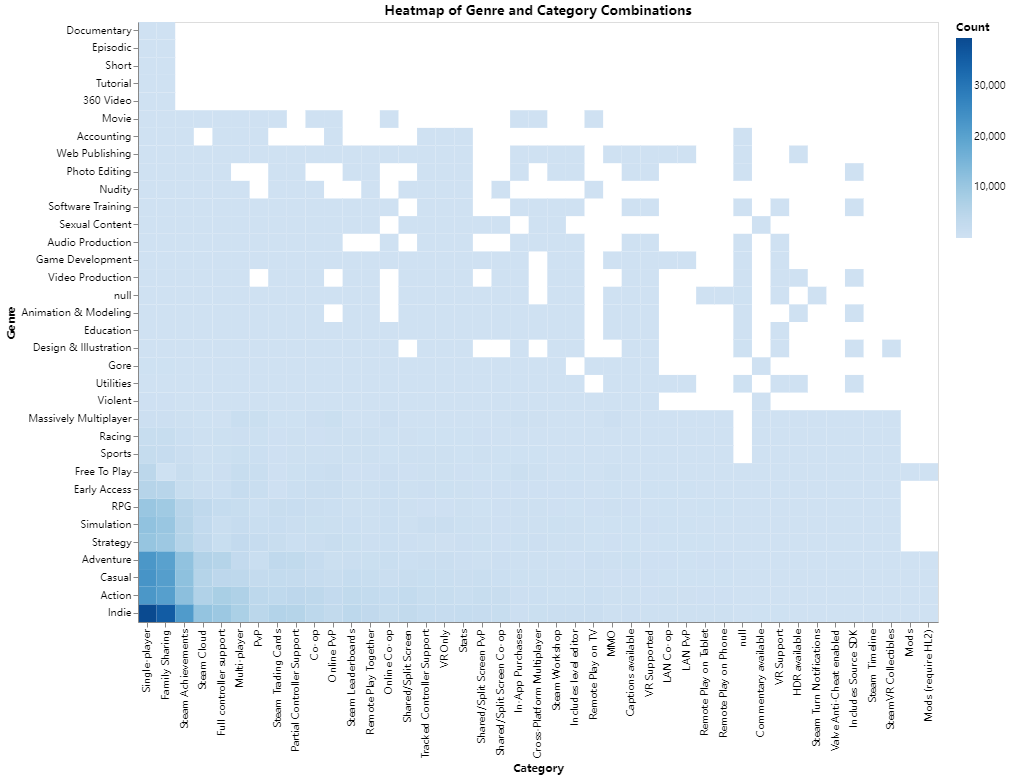

In [15]:
data_exploded = data.explode('genres').explode('categories')

heatmap = alt.Chart(data_exploded).mark_rect().encode(
    x=alt.X('categories:N', title='Category', sort='-color'),
    y=alt.Y('genres:N', title='Genre', sort='color'),
    color=alt.Color('count():Q', title='Count', scale=alt.Scale(scheme='blues')),
    tooltip=[alt.Tooltip('count():Q', title='Count')]
).properties(
    width=800,
    height=600,
    title='Heatmap of Genre and Category Combinations'
)
# heatmap.save("heatmap.png")
heatmap

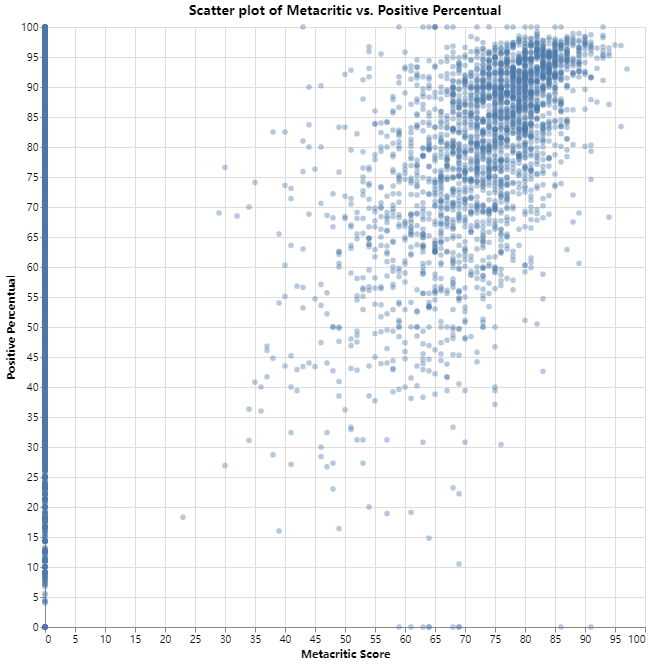

In [16]:
scatter = alt.Chart(data).mark_circle(opacity=0.4).encode(
    x=alt.X('metacritic:Q', title='Metacritic Score'),
    y=alt.Y('positive_percentual:Q', title='Positive Percentual')
).properties(
    width=600,
    height=600,
    title="Scatter plot of Metacritic vs. Positive Percentual"
)
# scatter.save("scatter.png")
scatter